In [1]:
import os

In [2]:
import numpy as np
import pandas as pd

In [3]:
#from igraph import *
import igraph # import igraph module
print(igraph.__version__)

0.8.2


In [4]:
%load_ext autoreload
%autoreload 2

## References
* [Official python-igraph tutorial](https://igraph.org/python/doc/tutorial/tutorial.html)
* [API Documentation](https://igraph.org/python/doc/python-igraph.pdf)
* [Visualising Graph Data with python-igraph](https://towardsdatascience.com/visualising-graph-data-with-python-igraph-b3cc81a495cf)
* [Newbies Guide to python-igraph](https://towardsdatascience.com/newbies-guide-to-python-igraph-4e51689c35b4)

### My auxiliary functions

In [5]:
import graph_utils as gru

In [6]:
#edge_set_df[['parent', 'child']]

### Parse **String Tie** Data

- **Parse** `splice_graph_st.tsv` file into two **dataframes** corresponding to the  `node_set` and `edge_set` of the splice graph

In [7]:
#node_set_df, edge_set_df = gru.string_tie_graph_to_dataframe(file="splice_graph_st.tsv")
node_set_df, edge_set_df = gru.string_tie_graph_to_dataframe(file="splice_graph_st.tsv", output_dir='')

In [8]:
#print(node_set_df.head())
#node_set_df.shape

In [9]:
#print(edge_set_df.head())
#edge_set_df.shape

# Python-igraph Tutorial

## Load graph Data

- **Load** graph from splice graph `node_set` and `edge_set` data

In [10]:
node_set_df = pd.read_csv('splice_graph.nodes', sep='\t')
print(node_set_df.head())
#node_set_df
#node_set_df.shape

     name      start        end  sum_coverage  length   coverage
0  source          0          0          0.00       1   0.000000
1       1  147928397  147928578       2548.00     182  14.000000
2       2  147936627  147936686       1415.50      60  23.591667
3       3  147938714  147938817       3082.25     104  29.637020
4       4  147943438  147943544       3201.00     107  29.915888


In [11]:
edge_set_df = pd.read_csv('splice_graph.edges', sep='\t')
print(edge_set_df.head())
#edge_set_df
#edge_set_df.shape

   from  to  weight
0     0   1       1
1     1   2       1
2     2   3       1
3     3   4       1
4     4   5       1


In [12]:
# https://stackoverflow.com/questions/32513650/can-import-edgelist-to-igraph-python
#sg = igraph.Graph.Read_Ncol('splice_graph.edges', directed=True)
#print(sg)

## Creating a graph from pandas DataFrame(s)

**Note**: there are many options for generating graph see - [Graph generation](https://igraph.org/python/doc/tutorial/generation.html#) for more info.

A common practice is to store edges in a `pandas.DataFrame`, where the two first columns are the **source** and **target** `vertex ids`, and any additional column indicates **edge** `attributes`.

You can generate a graph via `Graph.DataFrame()`:

In [13]:
#g = igraph.Graph.DataFrame(edge_set_df, directed=True)

It is possible to set **vertex** `attributes` at the same time via a separate `DataFrame`. 

The first column is assumed to contain all `vertex ids` (including any vertices without edges) and any additional columns are **vertex** `attributes`:

In [14]:
#g = Graph.DataFrame(edges, directed=False, vertices=vertices)

## Creating a graph from scratch

Create an **undirected graph** with no vertices or edges and assign it to the variable g

In [15]:
g = igraph.Graph()
g # g is an instance of igraph’s `Graph` class and that it is currently living at the memory address 0x7f35650.

Create an **directed graph** with no vertices or edges and assign it to the variable g

In [16]:
g = igraph.Graph(directed=True)
g

Output a more user-friendly summary using Python’s `print` statement:
    
`IGRAPH`, followed by (`U`='undirected' or `D`='directed') and a four-character long code:
* the number of **vertices**
* the number of **edges**
* two dashes (`–`) 
* the name of the graph (i.e. the contents of the name attribute, if any)

In [17]:
print(g)

IGRAPH D--- 0 0 --


A graph with no **vertices** and no **edges** is not really useful for us.

Let’s add some *vertices* with `Graph.add_vertices()` (i.e., the `add_vertices()` **method** of the `Graph` **class**), which *adds the given number of vertices to the graph.*

In [18]:
n_vertices = len(node_set_df)

# add vertices
g.add_vertices(n_vertices)
print(g)

IGRAPH D--- 19 0 --


Now our graph has vertices but no edges, so let’s add some edges as well.

You can add edges by calling `Graph.add_edges()` - but in order to add edges, you **have to refer to existing vertices somehow**. `igraph` uses `integer` **vertex IDs** starting from zero.

**Note**: if you try to add edges to vertices with invalid IDs (i.e., you try to add an edge to vertex 5 when you only have three vertices), you will get an exception.

*Edges* are specified by pairs of integers, so `[(0,1), (1,2)]` denotes a list of two edges. Passing this list to `Graph.add_edges()` *adds these two edges to your graph*:

In [19]:
edges = []
    
# add edges to the graph
g.add_edges(zip(edge_set_df['from'], edge_set_df['to']))
print(g)

IGRAPH D--- 19 22 --
+ edges:
0->1 1->2 2->3 3->4 4->5 5->6 4->6 6->7 7->8 8->9 0->10 10->11 9->11 11->12
11->13 13->14 14->15 15->16 0->17 12->18 16->18 17->18


We have an undirected graph with `19` **vertices** and `22` **edges**, and you can also see the **list of edges** in `igraph`’s output.

*Edges* also have IDs, similarly to vertices; they also start from zero and edges that were added later have higher IDs than edges that were added earlier. 

**Note**: *Vertex* and *edge* **IDs are always continuous**, and a direct consequence of this fact is that if you happen to delete an edge, chances are that some (or all) of the edges will be renumbered. Moreover, if you delete a vertex, even the vertex IDs will change.

*Edges* can be deleted by `delete_edges()` and it requires a list of edge IDs to be deleted (or a single edge ID). *Vertices* can be deleted by `delete_vertices()` and it requires a list of vertex IDs to be deleted (or a single vertex ID).

If you do not know the ID of an edge you wish to delete, but you know the IDs of the vertices at its two endpoints, you can use `get_eid()` to get the edge ID. 

Remember! all these are **methods** of the `Graph` **Class** and you must call them on the appropriate `Graph` **instance**! (e.g. `g.get_eid()`)

A new command `summary()`, it is a member of `igraph`’s own namespace and it can be used to *get an overview of a given graph object*. Its output is similar to the output of `print` but it **does not print the edge list** to avoid cluttering up the display for large graphs.

**Note**: In general, you should use `summary()` instead of print when working interactively with large graphs because printing the edge list of a graph with millions of vertices and edges could take quite a lot of time.

## Setting and retrieving attributes

*igraph* uses **vertex** and **edge** `IDs` in its core. Due to the issue that whenever vertices and edges are deleted, a large set of edge and possibly vertex IDs will be renumbered to ensure the continuity. One way to maintain the association between vertex IDs and say, their corresponding names is to have an additional Python list that maps from vertex IDs to names.

The drawback of this approach is that this additional list must be maintained in parallel to the modifications of the original graph. Luckily, *igraph* knows the concept of **attributes**, i.e., *auxiliary objects associated to a given vertex or edge of a graph, or even to the graph as a whole*.

Every *igraph* `Graph`, `vertex` and `edge` behaves as a standard *Python* `dictionary` in some sense, you can add *key-value pairs* to any of them:
* *key* representing the **name** of your attribute (the only restriction is that it must be a `string`)
* *value* representing the **attribute itself**.

**Note**: Attributes can be arbitrary Python objects, but if you are saving graphs to a file, only `string` and `numeric` attributes will be kept. See the `pickle` **module** in the standard Python library if you are looking for a way to save other attribute types. You can either *pickle* your attributes individually, store them as strings and save them, or you can *pickle* the whole Graph if you know that you want to load the graph back into Python only.

Every Graph object contains **two special members** called: 
* `vs` - v the sequence of all **vertices**
* `es` - the sequence of all **edges**

If you try to use `vs` or `es` as a Python *dictionary*, you will *manipulate the attribute storage area of the graph*:

In [20]:
#g.vs.__dir__()
g.vs

In [21]:
#node_set_df
#edge_set_df

In [22]:
# add ´node_info' to vertices in the graph
g.vs['name'] = node_set_df['name'].tolist()
g.vs['start'] = node_set_df['start'].tolist()
g.vs['end'] = node_set_df['end'].tolist()
g.vs['sum_coverage'] = node_set_df['sum_coverage'].tolist()
g.vs['length'] = node_set_df['length'].tolist()
g.vs['coverage'] = node_set_df['coverage'].tolist()

# add weights to edges in the graph
g.es['weight'] = edge_set_df['weight']

Whenever you use `vs` or `es` as a *dictionary*, you are *assigning attributes to **all vertices/edges** of the graph.*

However, you can simply alter the attributes of vertices and edges **individually** by indexing `vs` or `es` with integers as if they were lists (remember, they are sequences, they contain all the vertices or all the edges). 

When you index them, you obtain a `Vertex` or `Edge` object, which refers to  a **single vertex** or a **single edge** of the graph. `Vertex` and `Edge` objects can also be used as *dictionaries* to alter the attributes of that single vertex or edge:

In [23]:
g.es[0]

igraph.Edge(<igraph.Graph object at 0x7f9e20449350>, 0, {'weight': 1})

In [24]:
g.es[0].attributes()

{'weight': 1}

In [25]:
g.es[0]['weight'] = 2
g.es[0]

igraph.Edge(<igraph.Graph object at 0x7f9e20449350>, 0, {'weight': 2})

*Indexing* an `EdgeSeq` object returns `Edge` objects; the representation above shows:
* the graph the object belongs to
* the **edge ID** (zero in our case)
* the dictionary of **attributes** assigned to that edge.

`Edge` objects have some useful **attributes**, too:
* `source` gives you the source vertex of that edge
* `target` gives you the target vertex
* `index` gives you the corresponding edge ID
* `tuple` gives you a tuple containing the source and target vertices
* `attributes()` gives you a dictionary containing the attributes of this edge.

Vertex instances only have `index` and `attributes()`.

We can also assign *attributes* to the **whole graph**. `Graph` objects themselves can also behave as dictionaries:

In [26]:
g["date"] = "26-10-2020"
print(g["date"])

26-10-2020


Finally, it should be mentioned that attributes can be **deleted** by the Python keyword `del` just as you would do with any member of an ordinary dictionary:

In [27]:
#g.vs[3]["foo"] = "bar"
#g.vs["foo"]

In [28]:
#del g.vs["foo"]
#g.vs["foo"]

## Structural properties of graphs

Besides the simple *graph* and *attribute* **manipulation routines** described above, *igraph* provides a large set of **methods** to calculate various **structural properties of graphs**.

It is beyond the scope of this tutorial to document all of them, hence this section will only introduce a few of them for illustrative purposes. 

Probably the simplest property one can think of is the **vertex degree**. The **degree** of a vertex *equals the number of edges adjacent to it*. In case of directed networks, we can also define **in-degree** (the *number of edges pointing towards the vertex*) and **out-degree** (the *number of edges originating from the vertex*).

*igraph* is able to calculate all of them using a simple syntax:

In [29]:
g.degree()

[3, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 3]

Since our graph is *directed*, we can also calculate the in- and out-degrees separately using:

In [30]:
g.degree(mode="in") 

[0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3]

In [31]:
g.degree(mode="out")

[3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0]

You can also pass a **single** *vertex ID* or a **list** of *vertex IDs* to `degree()` if you want to calculate the degrees for *only a subset of vertices*:

In [32]:
g.degree(1)

2

In [33]:
g.degree([2,3,4])

[2, 2, 3]

**Note 1**: This calling convention applies to most of the **structural properties** *igraph* can calculate.
* For **vertex properties**, the methods accept a *vertex ID* or a *list of vertex IDs* (and if they are omitted, the default is the set of all vertices).
* For **edge properties**, the methods accept a *single edge ID* or a *list of edge IDs*.

Instead of a list of IDs, you can also supply a `VertexSeq` or an `EdgeSeq` instance appropriately. Later in the next chapter, you will learn how to restrict them to exactly the vertices or edges you want.

**Note 2**: For some measures, it does not make sense to calculate them only for a few vertices or edges instead of the whole graph, as it would take the same time anyway. 

In this case, the methods won’t accept *vertex* or *edge IDs*, but you can still restrict the resulting list later using **standard list indexing** and **slicing operators**. One such example is *eigenvector centrality* (`Graph.evcent()`).

## Querying vertices and edges based on attributes

### Selecting vertices and edges

magine that in a given network, you would like to find out who has the largest degree.

You can do that with the tools presented so far and some basic Python knowledge, but since it is a common task to **select** *vertices* and *edges* based on **attributes** or **structural properties**, *igraph* gives you an easier way to do that:

In [34]:
g.vs.select(_degree = g.maxdegree())["name"]

['11']

The syntax may seem a little bit awkward for the first sight, so let’s try to interpret it step by step: 

* `select()` is a **method** of `VertexSeq` and its sole purpose is to filter a `VertexSeq` based on the properties of individual vertices. 

The way it filters the vertices depends on its **positional** and **keyword arguments**.

*Positional* arguments (the ones without an explicit name like _degree above) are **always processed before *keyword* arguments (`kwargs`)** as follows:

* If the first *positional argument* is `None`, an empty sequence (containing no vertices) is returned:

In [35]:
seq = g.vs.select(None)
len(seq)

0

* If the first *positional argument* is a **callable object** (i.e., a *function*, a *bound method* or anything that behaves like a function), the object will be called for every vertex that’s currently in the sequence. If the **function returns True**, the vertex will be included, otherwise it will be excluded:

In [36]:
only_odd_vertices = g.vs.select(lambda vertex: vertex.index % 2 == 1)
len(only_odd_vertices)

9

* If the first *positional argument* is an **iterable** (i.e., a `list`, a `generator` or anything that can be iterated over), it **must return `integers`** and these integers will be considered as indices into the current vertex set (which is not necessarily the whole graph). Only **those vertices that match the given indices will be included** in the filtered vertex set. 

**Note**: `Floats`, `strings`, *invalid vertex IDs* will silently be ignored.

In [37]:
seq = g.vs.select([2, 3, 7])
len(seq)

3

In [38]:
[v.index for v in seq]

[2, 3, 7]

In [39]:
# filtering an existing vertex set
seq = seq.select([0, 2])         
[v.index for v in seq]

[2, 7]

In [40]:
# `Floats`, `strings`, *invalid vertex IDs* will silently be ignored. (actually not!)
seq = g.vs.select([2, 3, 7, "foo", 3.5])
len(seq)

TypeError: bad argument type for built-in operation

* If the first *positional argument* is an **`integer`**, all **remaining arguments are also expected to be integers** and they are interpreted as indices into the current vertex set. This is just `syntactic sugar`, you could achieve an equivalent effect by passing a list as the first positional argument, but this way you can omit the square brackets:

In [ ]:
seq = g.vs.select(2, 3, 7)
len(seq)

**Keyword arguments** can be used to *filter the vertices based on their* **attributes** or *their* **structural properties**. 

The name of each keyword argument should consist of at most two parts: 
* the **name** of the attribute or structural property
* the **filtering operator**.

The operator can be omitted; in that case, we automatically assume the equality operator. 

The possibilities are as follows (where name denotes the name of the attribute or property):

* **Equality `(==)`**:

    * `name_eq` - The attribute/property value **must be equal** to the value of the keyword argument
    * `name_ne` - The attribute/property value **must not be equal** to the value of the keyword argument

* **Less than `(<)` / more than `(>)`**:
    * `name_lt` - The attribute/property value **must be less than** the value of the keyword argument
    * `name_le` - The attribute/property value **must be less than or equal** to the value of the keyword argument
    * `name_gt` - The attribute/property value **must be greater than** the value of the keyword argument
    * `name_ge` - The attribute/property value **must be greater than or equal** to the value of the keyword argument
* **Inclusion**:
    * `name_in` - The attribute/property value **must be included in the value** of the keyword argument, which must be a sequence in this case
    * `name_notin` - The attribute/property value must not be included in the value of the the keyword argument, which must be a sequence in this case
    
For instance, the following command gives you the *nodes* with **coverage lower than 15** in the `splice graph`:

In [ ]:
seq = g.vs.select(length_lt=15)
[v.index for v in seq]

**Note:** Due to the syntactical constraints of Python, you **cannot use the admittedly simpler syntax** of `g.vs.select(age < 30)` as *only the **equality operator** is allowed to appear in an **argument list** in Python*.

To save you some typing, you can **even omit** the `select()` **method** if you wish:

In [41]:
seq = g.vs(length_lt=15)
[v.index for v in seq]

[0, 17, 18]

Theoretically, it can happen that there exists an *attribute* and a *structural property* with the same name (e.g., you could have a `vertex` **attribute** named `degree`). In that case, we would not be able to decide whether the user meant degree as a *structural property* or as a *vertex attribute*.

To resolve this ambiguity, **structural property names must always be preceded by an underscore (_) when used for filtering**. 

For example, to find vertices with **degree larger than 2**:

In [42]:
seq = g.vs(_degree_gt=2)
[v.index for v in seq]

[0, 4, 6, 11, 18]

There are also a few **special structural properties** for *selecting edges*:

* Using `_source` or `_from` in the *keyword argument list* of `EdgeSeq.select()` **filters based on the source vertices of the edges**.

E.g., to select all the edges originating from node who has vertex index 2:

In [43]:
seq = g.es.select(_from=2)
[v.index for v in seq]

[2]

* Using `_target` or `_to` **filters based on the target vertices**. This is different from `_source` and `_from` if the graph is **directed**.

In [44]:
seq = g.es.select(_to=2)
[v.index for v in seq]

[1]

* `_within` takes a `VertexSeq` object or a *list* or *set of vertex indices* and **selects all the edges that originate and terminate in the given vertex set**.

E.g., to select all the edges between *vertex index 2*, *vertex index 3* and *vertex index 4*:

In [45]:
seq = g.es.select(_within=[2,3,4])
[v.index for v in seq]

[2, 3]

alternatively, we could also have used a `VertexSeq` object:

In [46]:
seq = g.es.select(_within=g.vs[2:5])
[v.index for v in seq]

[2, 3]

* *_between* takes a `tuple` consisting of two `VertexSeq` objects or *lists* containing vertex indices or `Vertex` objects and **selects all the edges that originate in one of the sets and terminate in the other**.

E.g., to select all the edges that connect men to women:

In [47]:
seq = g.es.select(_between=([0], [17]))
[v.index for v in seq]

[18]

## Finding a single vertex or edge with some properties

In many cases we are looking for a **single vertex** or **edge** of a graph **with some properties**, and either we do not care which one of the matches is returned if there are multiple matches, or we know in advance that there will be only one match.

A typical example is *looking up vertices by their names in the name property*. `VertexSeq` and `EdgeSeq` objects provide the `find()` **method** for such use-cases:
* `find()` works similarly to `select()`, but it **returns only the first match if there are multiple matches**, and throws an exception if no match is found.

For instance, to look up the vertex corresponding to `name="tank"`, one can do this:

In [48]:
#node_1 = g.vs.find(name="1")
node_1 = g.vs.find(name="tank")
type(node_1)

igraph.Vertex

In [49]:
node_1.index

18

Looking up an unknown `name` will yield an exception:

In [50]:
g.vs.find(name="20")

ValueError: no such vertex: '20'

## Looking up vertices by names

Looking up vertices **by names** is a very common operation, and it is **usually much easier to remember the names of the vertices in a graph than their IDs**. 

To this end, *igraph* treats the `name` **attribute** of vertices *specially*; they are *indexed such that vertices can be looked up by their names in amortized constant time*. 

To make things even easier, *igraph* **accepts vertex names (almost) anywhere where it expects vertex IDs**, and **also accepts collections (list, tuples etc) of vertex names anywhere where it expects lists of vertex IDs** or `VertexSeq` instances.

E.g, you can simply look up the `degree` (number of connections) of node with `name="tank"` as follows:

In [51]:
g.degree("tank")

3

or, alternatively:

In [52]:
g.vs.find("tank").degree()

3

**Note:** The mapping between vertex names and IDs is maintained transparently by igraph in the background; whenever the graph changes, igraph also updates the internal mapping.

However, **uniqueness of vertex names is not enforced**; you can easily create a graph where two vertices have the same name, but igraph **will return only one of them when you look them up by names**, the other one will be available only by its index.

## Treating a graph as an adjacency matrix

**Adjacency matrix** is another way to form a graph. In *adjacency matrix*, rows and columns are labeled by graph **vertices**: the elements of the matrix indicate whether the vertices i and j have a common edge (i, j). 

The adjacency matrix for the example graph is:

In [53]:
g.get_adjacency()

Matrix([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Layouts and plotting

A **graph** is an *abstract mathematical object* without a specific representation in 2D or 3D space. This means that whenever we want to visualise a graph, we have to find a **mapping** from *vertices to coordinates* in two- or three-dimensional space first, preferably in a way that is pleasing for the eye. 

A separate branch of graph theory, namely graph drawing, tries to solve this problem via several **graph layout algorithms**. *igraph* implements quite a few layout algorithms and is also able to draw them onto the screen or to a `PDF`, `PNG` or `SVG` file using the [Cairo library](http://www.cairographics.org/).

**Note**: To follow the examples of this subsection, you need the Python bindings of the Cairo library. The previous chapter ([Installing igraph](https://igraph.org/python/doc/tutorial/install.html#installing-igraph)) tells you more about how to install Cairo’s Python bindings.

### Layout algorithms

The **layout methods** in *igraph* are to be found in the `Graph` object, and their always start with `layout_`.

The following table summarises them:

### [Layout algorithms](https://igraph.org/python/doc/tutorial/tutorial.html#layout-algorithms)

In [54]:
from matplotlib import cm
from matplotlib import colors

Layout algorithms can either be called directly or using the **common layout method** called `layout()`:

In [55]:
#import inspect

In [56]:
#print(inspect.getsource(g.layout_reingold_tilford))

In [57]:
layout = g.layout_kamada_kawai()

In [58]:
layout = g.layout("kamada_kawai")

The first argument of the `layout()` **method** must be the short name of the layout algorithm (see the table above). All the remaining *positional and keyword arguments* are passed intact to the chosen layout method.


For instance, the following two calls are completely equivalent:

In [59]:
layout = g.layout_reingold_tilford(root=[2])
layout = g.layout("tree", root=[2])

Layout methods return a `Layout` object which behaves mostly like a list of lists. Each **list entry** in a `Layout` object corresponds to a **vertex** in the original graph and *contains the vertex coordinates in the 2D or 3D space*.

`Layout` objects also contain some useful methods to *translate*, *scale* or *rotate* the coordinates in a batch. However, the primary utility of Layout objects is that you can pass them to the `plot()` **function** along with the graph to obtain a 2D drawing.

### Drawing a graph using a layout

For instance, we can plot our graph with the *Reingold-Tilford tree layout algorithm* as follows:

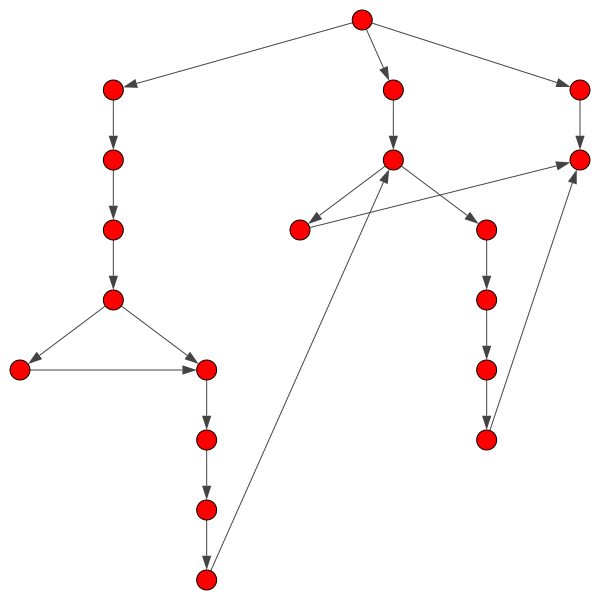

In [60]:
layout = g.layout("tree")
igraph.plot(g, layout = layout)

This should open an external image viewer showing a visual representation of the network.

A trivial addition would be to use the names as the **vertex labels** and to **color the vertices** according to coverage.
* Vertex labels are taken from the `label` **attribute**
* Vertex colors are determined by the `color` **attribute**

so we can simply create these attributes and re-plot the graph:

In [61]:
viridis_cmap = cm.get_cmap('viridis', 256)
scaled_coverage = colors.Normalize(vmin=0., vmax=max(g.vs['coverage']))

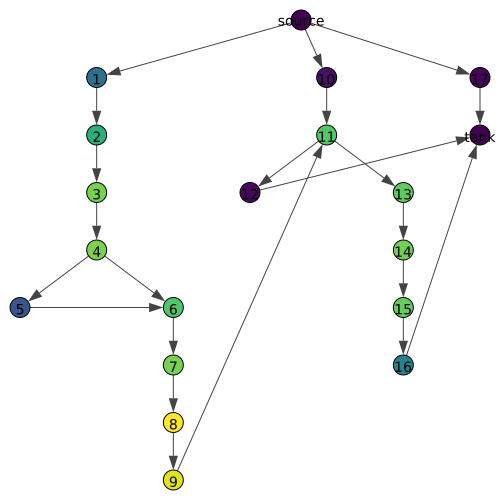

In [62]:
g.vs["label"] = g.vs["name"]
g.vs["color"] = [viridis_cmap(scaled_coverage(xx)) for xx in g.vs['coverage']]
igraph.plot(g, layout = layout, bbox = (500, 500), margin = 20)

Note that,  we are simply re-using the previous layout object here, but we also specified that we need:
* a **smaller plot** (`300 x 300 pixels`) 
* a **larger margin** around the graph to fit the labels (`20 pixels`).

Instead of specifying the **visual properties** as vertex and edge attributes, you can also give them as keyword arguments to `plot()`:

In [63]:
#igraph.plot(g, layout = layout, vertex_color = [viridis_cmap(scaled_coverage(xx)) for xx in g.vs['coverage']])

This latter approach is preferred if you want to keep the *properties of the visual representation* of your graph separate from the *graph itself*.

You can simply set up a Python dictionary containing the keyword arguments you would pass to plot() and then use the **double asterisk** (`**`) operator to pass your specific styling attributes to `plot()`:

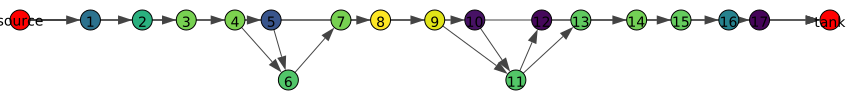

In [67]:
visual_style = {}
visual_style["vertex_size"] = 20
visual_style["vertex_color"] = [viridis_cmap(scaled_coverage(xx)) if xx != 0 else 'red' for xx in g.vs['coverage']]
visual_style["vertex_label"] = g.vs["name"]
visual_style["edge_width"] = g.es['weight']
#visual_style["layout"] = layout
visual_style["layout"] = gru.layout_splice_graph(g)
visual_style["bbox"] = (850, 100)
visual_style["margin"] = 20
igraph.plot(g, autocurve=True, **visual_style)

**To sum it all up**: there are special vertex and edge *properties* that correspond to the visual representation of the graph. These attributes override the default settings of *igraph* (see configuring-igraph for overriding the system-wide defaults). Furthermore, appropriate keyword arguments supplied to `plot()` override the visual properties provided by the vertex and edge attributes.

The following two tables summarise the most frequently used visual attributes for vertices and edges, respectively:

### [Vertex attributes controlling graph plots](https://igraph.org/python/doc/tutorial/tutorial.html#vertex-attributes-controlling-graph-plots)

### [Edge attributes controlling graph plots](https://igraph.org/python/doc/tutorial/tutorial.html#edge-attributes-controlling-graph-plots)

### [Generic keyword arguments of `plot()`](https://igraph.org/python/doc/tutorial/tutorial.html#generic-keyword-arguments-of-plot)

### [Specifying colors in plots](https://igraph.org/python/doc/tutorial/tutorial.html#generic-keyword-arguments-of-plot)

## Saving plots

*igraph* can be used to create publication-quality plots by asking the `plot()` function to *save the plot into a file instead of showing it on a screen*. This can be done simply by passing the **target filename** as an additional argument after the graph itself. 

The preferred format is inferred from the extension. *igraph* can save to anything that is supported by *Cairo*, including `SVG`, `PDF` and `PNG` files. *SVG* or *PDF* files can then later be converted to **PostScript** (.ps) or **Encapsulated PostScript** (.eps) format if you prefer that, while *PNG* files can be converted to **TIF** (.tif):

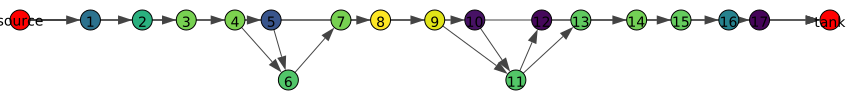

In [68]:
igraph.plot(g, "splice_network.pdf", **visual_style)

## *igraph* and the outside world

No graph module would be complete without some kind of **import/export** *functionality* that enables the package to communicate with external programs and toolkits.

*igraph* provides functions:
* to **read the most common graph formats** 
* to **save `Graph` objects into files** obeying these format specifications

The following table summarises the formats igraph can read or write:

**Note:**

Most of the *formats* have **their own limitations**;

* For instance, **not all of them can store attributes**. Your best bet is probably `GraphML` or `GML` if you want to save *igraph* graphs in a format that can be read from an external package and you want to preserve `numeric` and `string` **attributes**. 

* `Edge list` and `NCOL` is also fine if you **don’t have attributes** (`NCOL` supports *vertex names* and *edge weights*, though).

* If you don’t want to use your graphs outside igraph but you want to **store them for a later session**, the *pickled graph* format ensures that you get exactly the same graph back. The *pickled graph* format uses Python’s `pickle` **module** to store and read graphs.

There are two helper methods as well:
* `load()` is a generic entry point for reader methods which tries to infer the appropriate format from the file extension. 
* `Graph.save()` is the opposite of `load()`, it lets you save a graph where the preferred format is again inferred from the extension.

The format detection of `load()` and `Graph.save()` can be overridden by the `format` *keyword argument* which accepts the short names of the formats from the above table.

In [69]:
#karate = igraph.load("karate.GraphML")
#igraph.save("karate.net")
#igraph.save("karate.my_extension", format="gml")

## Where to go next

This tutorial was only scratching the surface of what igraph can do. My long-term plans are to extend this tutorial into a proper **manual-style documentation** to igraph in the next chapters.

In the meanwhile, check out the full [API documentation](https://igraph.org/python/doc/igraph-module.html) which should provide information about almost every igraph class, function or method. 

A good starting point is the documentation of the [Graph class](https://igraph.org/python/doc/igraph.Graph-class.html).

Should you get stuck, try asking in our [Discourse group](https://igraph.discourse.group/) first - maybe there is someone out there who can help you out immediately.